# Machine Learning & Statistics Assessment 

#### Boston-House-Prices
In this assessment I plan to upload and view the Boston House Prices dataset and analyse using descriptive statistics and plots. I will also use inferential statistics to analyse whether there is a significant difference in the median house prices between houses that are along the Charles river and those that aren't. Finally I hope to use keras to create a neural network that can predict the median house price based on the other variables in the dataset.


#### The Python Libraries to be used
Pandas is a package providing fast, flexible and expressive data structures designed to make working with data both easy and initutive.

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Numpy is the fundamental package for scientific computing with Python. Besides it's scientific uses it can also be used as an efficient multi-dimensional container of generic data.

Seaborn is a Python data visualizition library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Scikit-learn is a Python library for machine learning built on top of Numpy and some other packages.

Statsmodel is a powerful Python pachage for the estimation of statistical models, performing tests and more.

In [25]:
import numpy as np
import pandas as pd
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

#### The Dataset

The Boston House Prices data in this project was collected in 1978 by the US Census Service concerning housing in the area of Boston. It contains 506 enteries representing aggregate information about 14 features of homes from various suburbs in Boston. The dataset is accessible through the Python SKlearn library. 

In [5]:
from sklearn.datasets import load_boston # Importing the Boston House Dataset
boston_dataset = load_boston() # Assigning the dataset a reference

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) # Iniatilizing the dataset.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = boston_dataset.target # Including the Median House Price (MEDV) data in the dataset.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston.describe() # A look at the statistics of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Understanding the data
A breakdown of the different variables within the dataset keeping in mind each record in the database describes a Boston suburb or town.

CRIM per capita crime rate by town.

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town.

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX nitric oxides concentration (parts per 10 million).

RM average number of rooms per dwelling.

AGE proportion of owner-occupied units built prior to 1940.

DIS weighted distances to five Boston employment centres.

RAD index of accessibility to radial highways.

TAX full-value property-tax rate per 10,000usd.

PTRATIO pupil-teacher ratio by town.

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT % lower status of the population.

MEDV median value of owner-occupied homes in $1000s

### Descriptive Statisics
#### A look at the corroleation between the variables

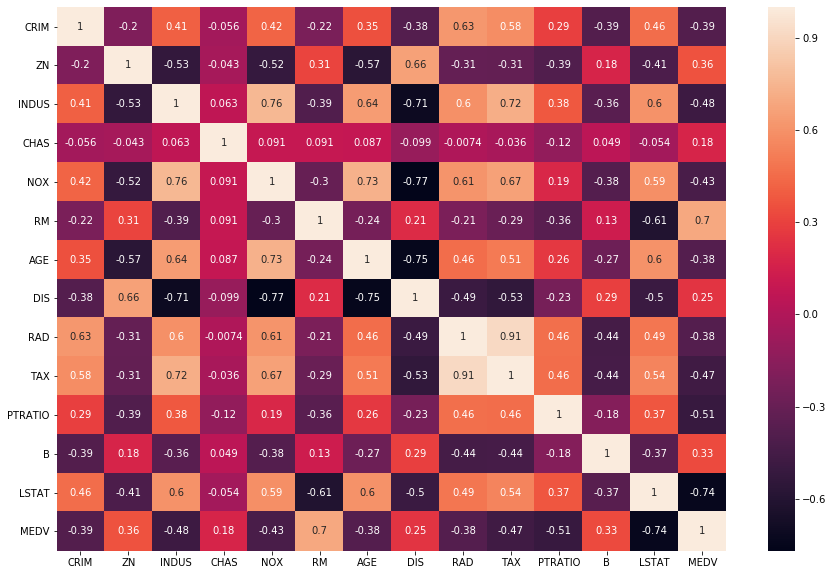

In [9]:
correlation_matrix = boston.corr()  
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)

Using a correlation matrix it's possible to measure the linear relationships between the variables within the dataset. The correlation cofficient ranges from -1 to 1. This indicates varibales with a strong positive correlation will be nearer to 1 and those with a negative correlation will be closer to -1.

The number of rooms per house (RM) has the closest positive correlation with the median house price (MEDV) 0.7. The variable with the most negative correlation to MEDV is the percentage lower status of the population (LSTAT).

#### Drawing Assumptions

Looking at the correlation matrix we can draw various assumptions about the relationships between the different variables.
For example the strong positive correlation between the median house price and the number of rooms per house would follow the common logic that the more rooms in a house the higher the price of that house. The strong negativve correlation betwwen the MEDV and LSTAT wuld follow the common logic that people in poorer lower income areas will be living in lower cost housing.

#### Simplyifing the dataset for a quick look at the descriptive statistics

There are 14 different variables within this data set. For the purpose of this project I will have a closer look at MEDV as the dependant variable, RM as the variable with the cloest positve correlation with MEDV, LSTAT as the variable with the closest negative correlation with MEDV and CHAS as this will be investigated further as per the project guidelines.

MEDV - Median value of owner occuied homes. I will use this as the dependent variable and the one that I will compare the other selected variables to.

LSTAT - % lower status of population.

CHAS - If houses have boundries along the Charles river or not.

RM - Average number of rooms per dwelling.

In [10]:
boston1 = boston.loc[:, ["LSTAT", "CHAS", "RM", "MEDV"]] # Tidying up the data to focus on the four variables I mentioned above.
boston1.head(10) 

,LSTAT,CHAS,RM,MEDV
0,4.98,0.0,6.575,24.0
1,9.14,0.0,6.421,21.6
2,4.03,0.0,7.185,34.7
3,2.94,0.0,6.998,33.4
4,5.33,0.0,7.147,36.2
5,5.21,0.0,6.430,28.7
6,12.43,0.0,6.012,22.9
7,19.15,0.0,6.172,27.1
8,29.93,0.0,5.631,16.5
9,17.10,0.0,6.004,18.9


#### A look at the Data Distribution

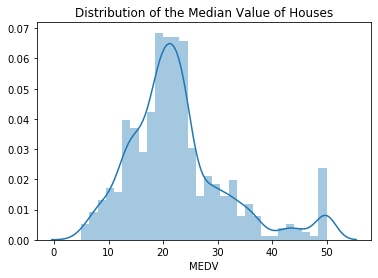

In [11]:
sns.distplot(boston1['MEDV'], bins=30)
plt.title ("Distribution of the Median Value of Houses")
plt.show()

The distribution of the MEDV is a normal distribution with a slight outlier at the more expensive median house price end of the scale. This indicates that the median house prices in the majority of the towns/suburbs is the same and then there are a smaller number of towns where the prices are lower and the same with higher prices although at the extreme end of the scale there are quite a few towns and suburbs where the median price is very high.

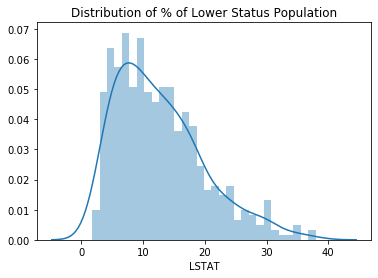

In [12]:
sns.distplot(boston1['LSTAT'], bins=30)
plt.title ("Distribution of % of Lower Status Population")
plt.show()

The distribution of the LSTAT is a sort of gamma distribution with the results skewed one side indicating that the number of poorer working class people must be more concentrated in a specific number of towns with other towns having a significantly lower number of poorer working class.

<function matplotlib.pyplot.show(*args, **kw)>

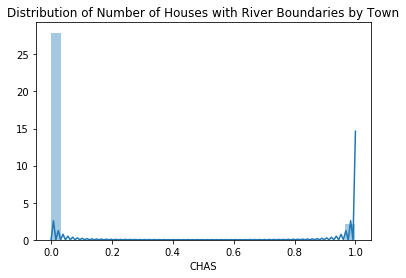

In [13]:
sns.distplot(boston1['CHAS'], bins=30)
plt.title ("Distribution of Number of Houses with River Boundaries by Town")
plt.show

The CHAS variable only has two values, 1 if on the river or 0 if not on the river so there is no real value in this graph other than the fact it clearly shows there are a lot more houses not on the river than the ones that are on the river.

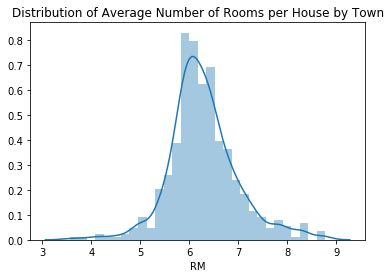

In [14]:
sns.distplot(boston1['RM'], bins=30)
plt.title ("Distribution of Average Number of Rooms per House by Town")
plt.show()

Like the MEDV, the RM distribution is normal. Again this would indicate the majority of houses in each town/suburb have a median number of rooms tapering off at both sides to indicate a much smaller number of houses with fewer rooms while also a a much smaller number of houses with many rooms. The same distribution as MEDV could indicate a possible relationship between the median house price and the number of rooms in a house.

#### A look at the relationships of the variables

Text(0.5, 1, 'Relationship between Median House Price and Areas of Poorer Working Class')

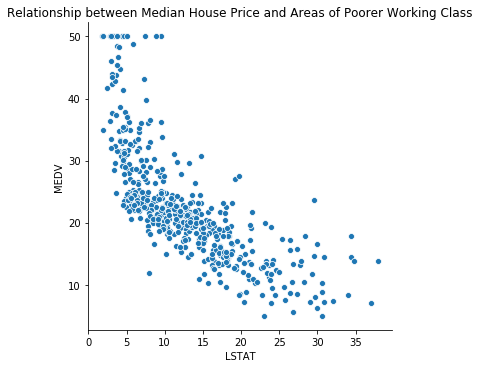

In [15]:
sns.relplot(x="LSTAT", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Areas of Poorer Working Class")

Looking at this plot the data there appears to be a relationship where the areas where there are a higher concentration of poorer working class people tend to be in areas where the MEDV is lower. This would make sense from a practical point of view as people on from poorer lower income areas would not be able to afford higher priced houses. 

Text(0.5, 1, 'Relationship between Median House Price and Houses on or off the Charles River')

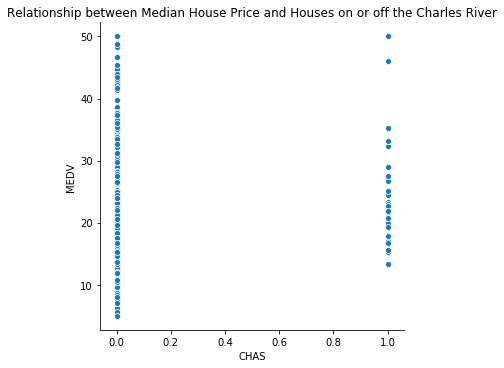

In [16]:
sns.relplot(x="CHAS", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Houses on or off the Charles River")

Looking at this plot does not tell too much about the relationship between the MEDV and houses on/off the Charles River other than that both appear to have a nice even spread along the MEDV price range. I will explore these two variables in further detail using inferential statistics later in this project.

Text(0.5, 1, 'Relationship between Median House Price and Number of Rooms per House')

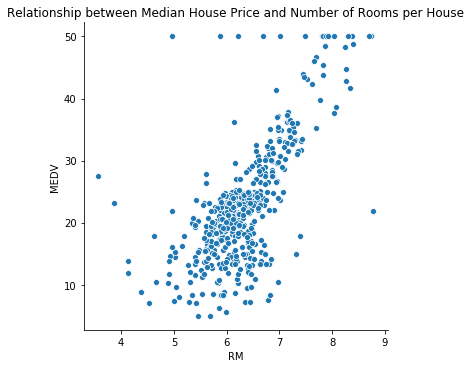

In [17]:
sns.relplot(x="RM", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Number of Rooms per House")

Looking at this plot as per the corrroleation matrix, there is an obvious relationship between the median house price and the number of rooms. The graph shows that the majority of houses have between 5 to 7 rooms and the majority of them fall within the MEDV of 10 to 30 thousand. As the MEDV increases the number of rooms per house also increases. The median house price does appear to be capped at 50,000.

### Using inferential statistics to analyse MEDV and CHAS variables

For this section of the project I would like to use some inforential statistics to analyse wether there is a significant difference in the median house prices (MEDV) between houses that are along the Charles River and those that are not(CHAS).In the dataset houses on the river are marked with 1 and those that are not are marked 0. Making a practical assumption I would expect to see houses with river boundries to have a higher median price than those that do not.

In [18]:
# Creating a dataframe containing just MEDV and CHAS
boston2 = boston.loc[:, ["CHAS", "MEDV"]]

In [19]:
boston2.pivot(columns="CHAS", values="MEDV").describe() # comparison of the descriptive stats between houses on and off the river

CHAS,0.0,1.0
count,471.000000,35.000000
mean,22.093843,28.440000
std,8.831362,11.816643
min,5.000000,13.400000
25%,16.600000,21.100000
50%,20.900000,23.300000
75%,24.800000,33.150000
max,50.000000,50.000000


From the information above we can see there are 35 houses that have a boundry on the Charles River and 471 houses that do not. We can also see as expected that the average MEDV for properties on the river is higher then the properties that do not have a river boundary.

In [20]:
# Splitting into two datasets
on = boston2[boston2["CHAS"] == 1]  # Houses with a river boundary
off = boston2[boston2["CHAS"] == 0] # Houses without a river boundary

To compare the houses on the Charles River and those off the river I will create a sample of data from the population of both datasets. The reason I am doing this is to have a comparision of the same number of houses from both variables.

In [21]:
# Getting a sample of MEDV of 20 houses on the Charles River
a = on["MEDV"].sample(n=20, random_state=1).describe() # Random State is used to reproduce this example
print (a)

count    20.000000
mean     29.265000
std      11.670533
min      15.600000
25%      21.100000
50%      26.050000
75%      33.700000
max      50.000000
Name: MEDV, dtype: float64


In [22]:
# Getting a sample of MEDV of 20 houses off the Charles River
b = off["MEDV"].sample(n=20, random_state=1).describe() # Random State is used to reproduce this example
print (b)

count    20.000000
mean     25.885000
std      13.313044
min       8.500000
25%      16.250000
50%      21.450000
75%      36.300000
max      50.000000
Name: MEDV, dtype: float64


#### T-test of the two variables

An independent-samples t-test compares the mean between two unrelated groups on the same continuous, dependant variable. 

There are certain assumptions that need to be made in order for this test to give a valid result.

Assumption 1 - The dependent variable should be measured on a continuous scale. In this case the MEDV is measured from 5,000 to 50,0000

Assumption 2 - The independent variables should consist of two categorical, independent groups. In this case houses with a boundary on the River Charles and houses with no boundary the River Charles.

Assumption 3 - There should be independence of observations which means there is no relationship between the observations  in each group or between the group themselves. The data has been collected for different areas around the boston region so I will make an assumption that there is no conflict here. A house cannot be classed as having a river boundary while at the same time also not having a river boundary.

Assumption 4 - There should be no significat outliers. We have seen in a graph earlier that there are no significant outliers when looking at the MEDV variable especially with the median price capped at 50,000.

Assumptuion 5 - The dependent variable should be approximately normally distrubed. We have seen in an earleir grah the MEDV follows a normal distribution.

Assumption 6 - There needs to be homogenity of variances. I will conduct this check using the stats.levane() methd from scipy stats.

In [26]:
stats.levene(a, b) # Checking the homogenity of variances

LeveneResult(statistic=0.01971710699033926, pvalue=0.890330304726779)

Levannes test checks for homogenity of variances and the null hypothesis is that all variances are equal. A resulting p-value under 0.05 means that variances are not equal. A p-value of greater than 0.05 indicates that there is no significant difference in variances betwween the groups. As the above p-value is greater than 0.05 we can say assumption 6 has been met.

In [27]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=0.3068308608589971, pvalue=0.7634883503894568)

The t test is a measurement of whether the average (expected) value will differ significantly across the samples provided. The p-value is a score between 0 an 1 which tells us whether or not the difference between our sample observations and our hypothesis is significantly different. 0.05 is the reference value. If the p-value is smaller than 0.05 then the difference is significant. If the differenence of the p-value is greater than 0.05 than the difference is said to not be significant. In this case the p-value is over 0.5 so we can accept the null hypothesise.